# **PROJET CREDIT SCORING**

## phase 1 : exploration des donneés pour voir les plus grandes corrélations avec l'octroi ou non de crédit


### **INTRODUCTION**:


Le scoring bancaire est une méthode essentielle dans la gestion des risques de crédit. Il permet aux institutions financières d’évaluer la solvabilité des clients et de déterminer leur capacité à rembourser un prêt. Ce processus repose sur l’analyse de données, afin d’identifier les caractéristiques qui différencient les clients susceptibles d’obtenir un crédit de ceux présentant un risque élevé.

Dans le cadre de ce projet, la première étape consiste à explorer les données pour identifier les plus grandes corrélations avec l’octroi ou non de crédit. Pour cela, nous avons appliqué une méthode de clustering, qui regroupe les clients en différentes classes en fonction de leurs similitudes. L’objectif de cette analyse exploratoire est de mieux comprendre les relations entre les variables et de poser les bases d’un modèle de scoring fiable et précis.

### **EXPLORATION DES DONNEES**

In [4]:
##importer la base######
import pandas as pd
german_credit_data=pd.read_table("/content/german_credit_data.csv",sep=",",header=0,index_col=0)
german_credit_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [5]:
##renommer les colonnes
german_credit_data.rename(columns={"Saving accounts":"compte d'epargne","Checking account":"compte courant","Credit amount":"montant du credit","Duration":"duree","Purpose":"but"},inplace=True)
german_credit_data

,Age,Sex,Job,Housing,compte d'epargne,compte courant,montant du credit,duree,but,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [6]:
#####statistique descriptive######
print(german_credit_data.describe(include="all"))

                Age   Sex          Job Housing compte d'epargne  \
count   1000.000000  1000  1000.000000    1000              817   
unique          NaN     2          NaN       3                4   
top             NaN  male          NaN     own           little   
freq            NaN   690          NaN     713              603   
mean      35.546000   NaN     1.904000     NaN              NaN   
std       11.375469   NaN     0.653614     NaN              NaN   
min       19.000000   NaN     0.000000     NaN              NaN   
25%       27.000000   NaN     2.000000     NaN              NaN   
50%       33.000000   NaN     2.000000     NaN              NaN   
75%       42.000000   NaN     2.000000     NaN              NaN   
max       75.000000   NaN     3.000000     NaN              NaN   

       compte courant  montant du credit        duree   but  Risk  
count             606        1000.000000  1000.000000  1000  1000  
unique              3                NaN          NaN     8

In [7]:
##les information de la base
german_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1000 non-null   int64 
 1   Sex                1000 non-null   object
 2   Job                1000 non-null   int64 
 3   Housing            1000 non-null   object
 4   compte d'epargne   817 non-null    object
 5   compte courant     606 non-null    object
 6   montant du credit  1000 non-null   int64 
 7   duree              1000 non-null   int64 
 8   but                1000 non-null   object
 9   Risk               1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [8]:
##variables
german_credit_data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'compte d'epargne', 'compte courant',
       'montant du credit', 'duree', 'but', 'Risk'],
      dtype='object')

In [9]:
#nombre total de valeur nul#

print("nous constatons que les variables qui ont des valeurs nuls sont au nombre de:", german_credit_data.isnull().sum().sum())

nous constatons que les variables qui ont des valeurs nuls sont au nombre de: 577


In [10]:
##afficher les variables qui ont des valeurs nul
german_credit_data.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
compte d'epargne,183
compte courant,394
montant du credit,0
duree,0
but,0
Risk,0


In [11]:
#nombre de doublons
german_credit_data.duplicated().sum()

0

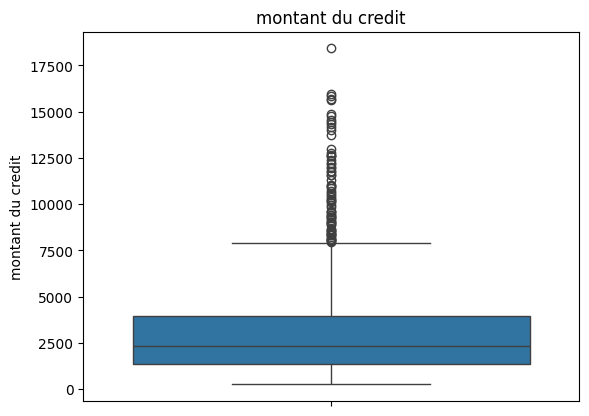

In [12]:
#traçons les boxplots
import seaborn as sn
import matplotlib.pyplot as plt
sn.boxplot(german_credit_data['montant du credit'])

plt.title('montant du credit')
plt.show()

plt.show()

In [13]:
##les valeurs aberrantes par la methodes de z-score
lim_sup=german_credit_data['montant du credit'].mean()+3*german_credit_data['montant du credit'].std()

lim_inf=german_credit_data['montant du credit'].mean()-3*german_credit_data['montant du credit'].std()

val_aber=german_credit_data.loc[(german_credit_data['montant du credit']>lim_sup)| (german_credit_data['montant du credit']<lim_inf),:]
val_aber

,Age,Sex,Job,Housing,compte d'epargne,compte courant,montant du credit,duree,but,Risk
18,44,female,3,free,little,moderate,12579,24,car,bad
63,25,male,2,own,little,moderate,14421,48,business,bad
87,47,male,2,free,moderate,moderate,12612,36,education,bad
95,58,male,2,rent,little,moderate,15945,54,business,bad
105,39,male,3,own,little,moderate,11938,24,vacation/others,bad
236,23,male,0,own,NaN,moderate,14555,6,car,bad
272,36,male,3,free,NaN,moderate,12169,48,car,good
274,34,male,1,own,little,little,11998,30,repairs,bad
373,63,male,3,free,NaN,NaN,13756,60,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad


In [14]:
##bonne base sans les valeurs aberrantes
german_credit=german_credit_data[(german_credit_data['montant du credit']>lim_inf)&(german_credit_data['montant du credit']<lim_sup)]
german_credit

,Age,Sex,Job,Housing,compte d'epargne,compte courant,montant du credit,duree,but,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [15]:
# Supprimer les colonnes spécifiques
german_credit = german_credit.drop(columns=['Housing', 'compte courant', 'compte d\'epargne', 'but'])


german_credit


,Age,Sex,Job,montant du credit,duree,Risk
0,67,male,2,1169,6,good
1,22,female,2,5951,48,bad
2,49,male,1,2096,12,good
3,45,male,2,7882,42,good
4,53,male,2,4870,24,bad
...,...,...,...,...,...,...
995,31,female,1,1736,12,good
996,40,male,3,3857,30,good
997,38,male,2,804,12,good
998,23,male,2,1845,45,bad


In [16]:
##renommer##
# Remplacer 'Femme' par 0 et 'Homme' par 1 dans la colonne 'Genre'
german_credit['Sex'] = german_credit['Sex'].replace({'female': 0, 'male': 1})


<ipython-input-16-613c844da4f7>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  german_credit['Sex'] = german_credit['Sex'].replace({'female': 0, 'male': 1})


In [17]:
german_credit

,Age,Sex,Job,montant du credit,duree,Risk
0,67,1,2,1169,6,good
1,22,0,2,5951,48,bad
2,49,1,1,2096,12,good
3,45,1,2,7882,42,good
4,53,1,2,4870,24,bad
...,...,...,...,...,...,...
995,31,0,1,1736,12,good
996,40,1,3,3857,30,good
997,38,1,2,804,12,good
998,23,1,2,1845,45,bad


###**VISUALISATION DES DONNEES**

In [18]:
##voir les lignes et les colonnes##

german_credit.shape

(975, 6)

In [19]:
##valeur existentielle daans job
german_credit['Job'].value_counts()

,count
Job,
2,622
1,199
3,133
0,21


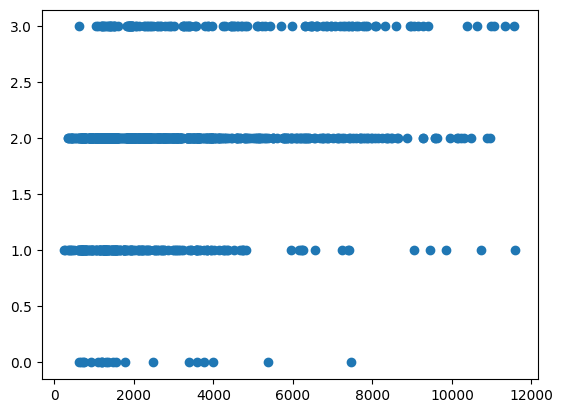

In [20]:
###visuaalisation

from matplotlib import pyplot as plt

plt.scatter(german_credit['montant du credit'],german_credit['Job'])

plt.show()

In [23]:
###importer la library k-means##
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [24]:
# Création d'un objet LabelEncoder
encoder = LabelEncoder()

# Itération à travers chaque colonne du DataFrame
for col in german_credit.columns:
    # Vérification si la colonne contient des données de type chaîne de caractères
    if german_credit[col].dtype == 'object':
        # Ajuster l'encodeur sur les valeurs uniques de la colonne
        encoder.fit(german_credit[col])
        # Transformer la colonne en utilisant l'encodeur
        german_credit[col] = encoder.transform(german_credit[col])

# Maintenant que toutes les données sont numériques, définir et entraîner votre modèle KMeans
model = KMeans(n_clusters=4)
model.fit(german_credit)
model.predict(german_credit)

array([1, 0, 1, 2, 0, 2, 3, 0, 3, 0, 1, 3, 1, 1, 1, 1, 3, 2, 3, 1, 3, 3,
       1, 1, 1, 1, 1, 3, 0, 1, 3, 0, 1, 1, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       1, 3, 1, 2, 1, 3, 0, 1, 3, 1, 1, 0, 2, 1, 0, 1, 1, 1, 3, 0, 1, 1,
       1, 3, 2, 1, 1, 0, 1, 1, 3, 0, 2, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1,
       1, 1, 3, 1, 1, 3, 3, 0, 1, 3, 1, 1, 3, 0, 0, 2, 1, 1, 1, 0, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 0, 3, 1, 2, 1, 2,
       1, 3, 1, 1, 0, 3, 3, 3, 3, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 3,
       1, 3, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 2,
       0, 1, 3, 1, 1, 0, 1, 1, 3, 0, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 0,
       1, 1, 2, 1, 1, 0, 1, 3, 3, 0, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 0,
       3, 2, 2, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 0, 1, 3, 1, 1, 1,
       1, 1, 1, 3, 1, 3, 1, 2, 3, 1, 3, 1, 1, 1, 0, 3, 1, 1, 0, 1, 2, 1,
       3, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 3, 2, 0, 2, 1, 1, 1, 2, 0, 0,
       2, 2, 0, 1, 3, 3, 1, 3, 1, 1, 2, 1, 0, 1, 1,

In [25]:
##inertie intraclasse

model.inertia_

411594571.5687617

In [26]:
##position des centroides

model.cluster_centers_

array([[3.64958678e+01, 7.85123967e-01, 2.16528926e+00, 5.69918182e+03,
        3.00743802e+01, 6.36363636e-01],
       [3.55511482e+01, 6.38830898e-01, 1.75365344e+00, 1.35022338e+03,
        1.42922756e+01, 7.24425887e-01],
       [3.58800000e+01, 7.06666667e-01, 2.22666667e+00, 8.72916000e+03,
        3.63733333e+01, 6.00000000e-01],
       [3.47633333e+01, 7.16666667e-01, 1.91000000e+00, 3.11952667e+03,
        2.23733333e+01, 7.43333333e-01]])

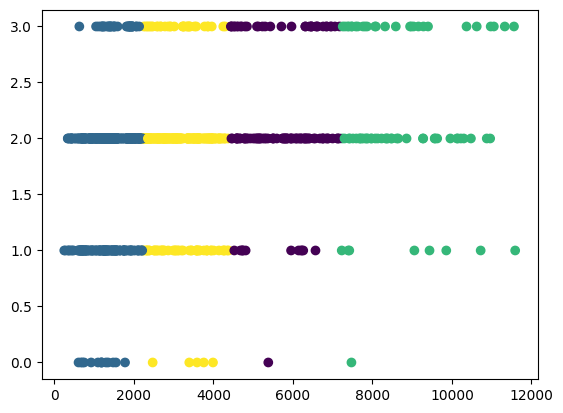

In [27]:
##visualisation avec des groupes predites avec la variable Job
from matplotlib import pyplot as plt

plt.scatter(german_credit['montant du credit'],german_credit['Job'],c=model.predict(german_credit))

plt.show()

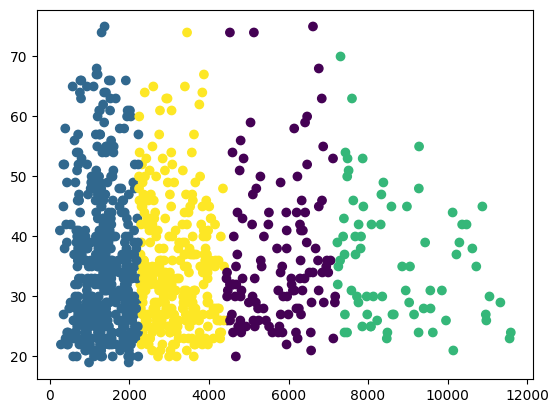

In [28]:
##visualisation avec des groupes predites avec la variable
from matplotlib import pyplot as plt

plt.scatter(german_credit['montant du credit'],german_credit['Age'],c=model.predict(german_credit))

plt.show()

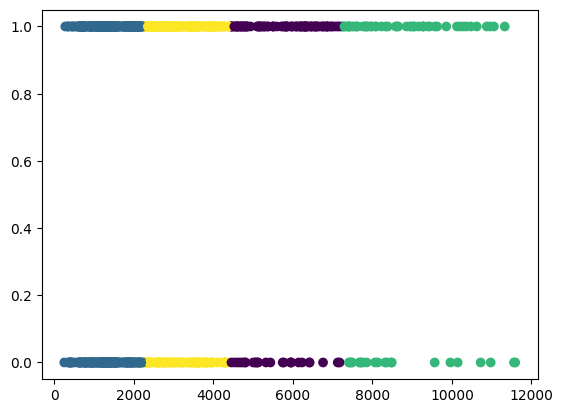

In [29]:
##visualisation avec des groupes predites avec la variable Sex
from matplotlib import pyplot as plt

plt.scatter(german_credit['montant du credit'],german_credit['Sex'],c=model.predict(german_credit))

plt.show()

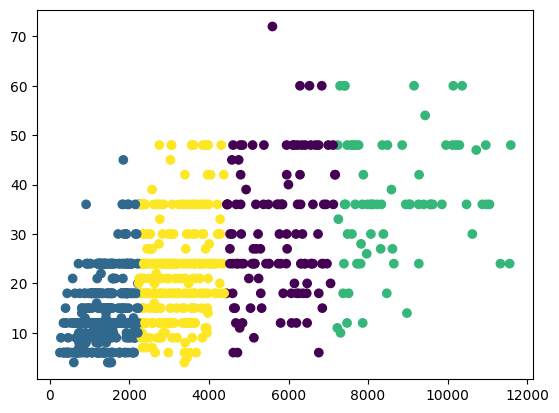

In [30]:
##visualisation avec des groupes predites avec la variable duree
from matplotlib import pyplot as plt

plt.scatter(german_credit['montant du credit'],german_credit['duree'],c=model.predict(german_credit))

plt.show()

In [31]:
#centrage et reduction
from sklearn import preprocessing
german_credit_cr=preprocessing.scale(german_credit)
german_credit_cr

array([[ 2.7906033 ,  0.67631287,  0.17207228, -0.80438216, -1.24664351,
         0.63949944],
       [-1.18981672, -1.4786056 ,  0.17207228,  1.29417574,  2.38035839,
        -1.56372302],
       [ 1.19843529,  0.67631287, -1.38135805, -0.39757263, -0.72850038,
         0.63949944],
       ...,
       [ 0.22544373,  0.67631287,  0.17207228, -0.96456066, -0.72850038,
         0.63949944],
       [-1.10136294,  0.67631287,  0.17207228, -0.50772278,  2.12128683,
        -1.56372302],
       [-0.74754783,  0.67631287,  0.17207228,  0.69076355,  2.12128683,
         0.63949944]])

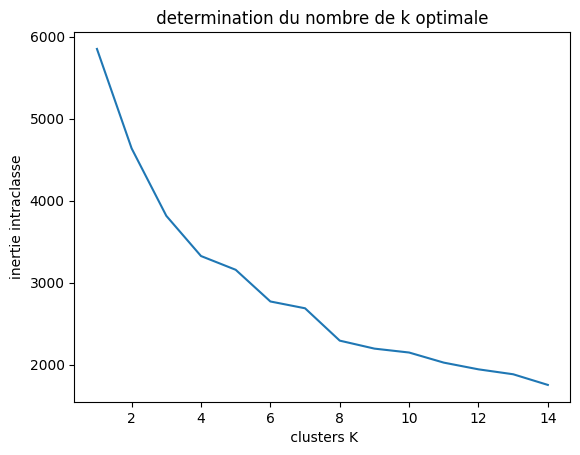

In [32]:
##chercher le cas optimal

##liste vide
inertie=[]


#### generer des entiers ####
gener=range(1,15)


for i in gener:
    ########### construitre le mpodéle de kmeans et l'entrainer dans le dataset X




    models=KMeans(n_clusters=i).fit(german_credit_cr)
    ####### ajouter linertie de chaque classe dans la liste
    inertie.append(models.inertia_)



plt.plot(gener,inertie)
plt.xlabel(' clusters K')
plt.ylabel('inertie intraclasse')
plt.title(" determination du nombre de k optimale ")
plt.show()

In [33]:
##modelisons avec le k-optimal=5
##definir le model k-means##
model=KMeans(n_clusters=4)

##entrainer le modele dans la dataset fromage_cr##
model.fit(german_credit_cr)

##predire les nouvelles classes##
model.predict(german_credit_cr)

array([2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 1, 3, 0, 1, 0, 1, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 0, 3, 3, 1, 2, 2, 2, 2, 2, 3, 3,
       0, 2, 0, 2, 0, 2, 3, 2, 2, 1, 2, 3, 3, 0, 1, 2, 2, 3, 0, 2, 0, 2,
       1, 0, 3, 2, 2, 3, 1, 2, 3, 2, 3, 2, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2,
       2, 1, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2, 2, 3, 2, 3, 2, 2, 0, 2, 3, 2,
       3, 3, 0, 1, 2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 3, 3, 2, 2, 3, 0, 3,
       1, 2, 0, 2, 3, 2, 1, 0, 3, 0, 0, 3, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 3, 2, 2, 2, 2, 3,
       3, 1, 2, 1, 2, 1, 2, 1, 0, 3, 3, 1, 2, 3, 1, 0, 1, 2, 1, 2, 2, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 0, 3, 1, 2, 0, 2, 3, 2, 0, 2, 0, 2, 2, 2,
       2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 3, 0, 0, 2, 2, 2,
       2, 1, 0, 0, 1, 2, 2, 3, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 3, 0, 3, 2,
       2, 0, 3, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 1, 2, 3, 3, 3,
       3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 3, 2, 0, 1, 1,

In [34]:
##afficher les differents types de groupes

##index tries les groupes
import numpy as np

idk=np.argsort(model.labels_) ##model.labels c'est ce que le modele a predit ##np.argsort permet de trier les indices d'un tableau de facon croissant

##affichage des observationt et leur groupes
dd=pd.DataFrame(german_credit.index[idk],model.labels_[idk])
dd

,0
0,306
0,347
0,135
0,875
0,244
...,...
3,226
3,805
3,808
3,780


In [35]:
##ajouter la variables classes
german_credit['classe']=model.predict(german_credit_cr)
german_credit['classe']

,classe
0,2
1,3
2,2
3,3
4,1
...,...
995,0
996,3
997,2
998,1


In [36]:
german_credit

,Age,Sex,Job,montant du credit,duree,Risk,classe
0,67,1,2,1169,6,1,2
1,22,0,2,5951,48,0,3
2,49,1,1,2096,12,1,2
3,45,1,2,7882,42,1,3
4,53,1,2,4870,24,0,1
...,...,...,...,...,...,...,...
995,31,0,1,1736,12,1,0
996,40,1,3,3857,30,1,3
997,38,1,2,804,12,1,2
998,23,1,2,1845,45,0,1


In [37]:
moy = pd.DataFrame(german_credit)
# Calculer la moyenne pour chaque classe par rapport à chaque variable
moyennes_par_classe = moy.groupby('classe').mean()

# Afficher le résultat
moyennes_par_classe

,Age,Sex,Job,montant du credit,duree,Risk
classe,,,,,,
0,34.456989,0.000000,1.811828,2142.494624,15.935484,1.000000
1,32.826923,0.581731,1.778846,2088.100962,18.923077,0.000000
2,37.066015,1.000000,1.826406,2264.070905,16.009780,1.000000
3,35.860465,0.808140,2.255814,6791.098837,37.656977,0.563953


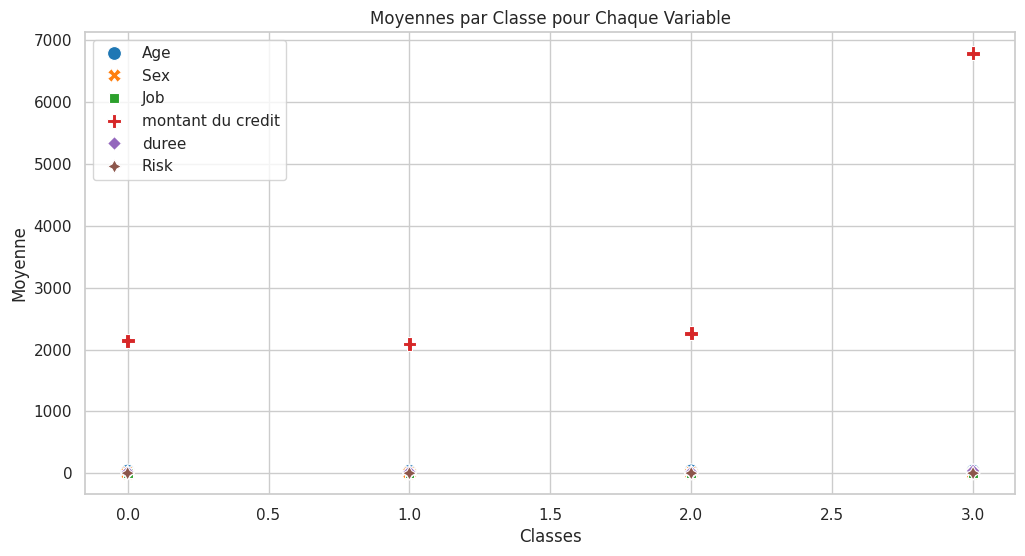

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns


# Utiliser seaborn pour améliorer la visibilité du graphique
sns.set(style="whitegrid")

# Tracer le graphique en utilisant un point pour chaque classe
plt.figure(figsize=(12, 6))
sns.scatterplot(data=moyennes_par_classe, palette="tab10", s=100)
plt.title('Moyennes par Classe pour Chaque Variable')
plt.xlabel('Classes')
plt.ylabel('Moyenne')
plt.show()

### **CONCLUSION**

L’exploration des données effectuée dans le cadre de ce projet, à l’aide du clustering, a permis de regrouper les clients en classes distinctes selon leurs caractéristiques socio-économiques et financières. Cette approche a révélé des tendances intéressantes, notamment en ce qui concerne les variables comme l’âge, le montant du crédit, la durée, le sexe et le type d’emploi.

1. Profil des clients selon les classes :

* La classe 0 regroupe majoritairement des clients masculins (valeur 1 pour Sexe) occupant des emplois qualifiés ou hautement qualifiés (valeurs 2 ou 3 pour Job). Ils demandent des crédits avec des montants élevés et des durées de remboursement longues, ce qui traduit une stabilité financière et une capacité d’endettement importante.
* La classe 1 est composée de clients aux profils plus modestes, incluant des individus non qualifiés et résidents (valeur 1 pour Job). Ces clients demandent des montants plus faibles pour des durées de remboursement plus courtes, ce qui peut traduire une capacité financière limitée ou une aversion au risque.
* Les classes 2 et 3 présentent des profils plus diversifiés :
La classe 2 regroupe des clients plus jeunes, avec un mélange d’emplois qualifiés (valeur 2) et non qualifiés (valeur 0 ou 1), demandant des crédits de montants modérés.
La classe 3 inclut des individus plus âgés, souvent masculins, occupant des emplois qualifiés ou hautement qualifiés et demandant des crédits aux montants moyens mais avec des durées de remboursement similaires à la classe 2.

2. Corrélations identifiées :

* Les variables type d’emploi (Job) et sexe (Sexe) ont montré une influence notable sur les montants de crédit demandés et leur durée. Par exemple, les clients occupant des emplois qualifiés ou hautement qualifiés sont associés à des montants de crédit plus élevés et des durées de remboursement plus longues, tandis que ceux occupant des emplois non qualifiés tendent à demander des crédits plus modestes.
* De même, les clients masculins (valeur 1 pour Sexe) semblent demander des crédits plus élevés en moyenne que les clients féminins (valeur 0 pour Sexe), bien que d’autres facteurs tels que l’âge et la stabilité financière jouent également un rôle important.

## phase 2 : développement d'un modèle de prédiction de scoring crédit

### **INTRODUCTION**

Le scoring bancaire est une méthode essentielle dans la gestion du risque crédit, utilisée pour évaluer la probabilité qu'un client rembourse un crédit. Ce processus consiste à attribuer une note à chaque client en fonction de plusieurs critères, permettant ainsi aux institutions financières de déterminer si elles doivent accorder un prêt ou non. Les variables prises en compte peuvent inclure des informations financières telles que le revenu, le montant du crédit demandé, l'historique de paiement, mais aussi des éléments démographiques comme l'âge, le sexe, la profession, etc.

Dans ce travail, nous avons utilisé le modèle d'arbre de décision pour développer un modèle de prédiction du scoring crédit. L'arbre de décision est un algorithme d'apprentissage supervisé qui divise les données en sous-groupes homogènes en fonction des caractéristiques les plus significatives. Cela permet de créer un modèle simple et facilement interprétable, idéal pour la prédiction de l'octroi ou du refus de crédit. L'objectif de ce travail est d'explorer les caractéristiques influençant l'approbation des prêts et de prédire avec précision les clients susceptibles de se voir accorder un crédit en fonction de ces critères.

### EXPLORATION DES DONNEES

In [39]:
german_credit

,Age,Sex,Job,montant du credit,duree,Risk,classe
0,67,1,2,1169,6,1,2
1,22,0,2,5951,48,0,3
2,49,1,1,2096,12,1,2
3,45,1,2,7882,42,1,3
4,53,1,2,4870,24,0,1
...,...,...,...,...,...,...,...
995,31,0,1,1736,12,1,0
996,40,1,3,3857,30,1,3
997,38,1,2,804,12,1,2
998,23,1,2,1845,45,0,1


In [40]:
######voir les informations de la base###
german_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                975 non-null    int64
 1   Sex                975 non-null    int64
 2   Job                975 non-null    int64
 3   montant du credit  975 non-null    int64
 4   duree              975 non-null    int64
 5   Risk               975 non-null    int64
 6   classe             975 non-null    int32
dtypes: int32(1), int64(6)
memory usage: 57.1 KB


### analyse predictive: training and test data

In [41]:
from sklearn.model_selection import train_test_split


X=german_credit.drop('classe', axis=1)

y=german_credit['classe']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

regression ligistique

In [42]:
##entrainement du modele par la regression logistique

from sklearn.linear_model import LogisticRegression

##construction du modele

rgl=LogisticRegression()

##entraainement du modele

rgl.fit(X_train,y_train)

##€valuation du modele

rgl.score(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5384615384615384

In [43]:
##test du modele
##€valuation du modele

rgl.score(X_test,y_test)

0.5692307692307692

modele de knn

In [44]:
from sklearn.neighbors import KNeighborsClassifier

################ construire le modéle ###################################

knn=KNeighborsClassifier()

################# entrainement du modéle ################################

knn.fit(X_train,y_train)
############################ calcul du score ###########################################

knn.score(X_train,y_train)

0.6230769230769231

In [45]:
############################ calcul du score ###########################################

knn.score(X_test,y_test)

0.49743589743589745

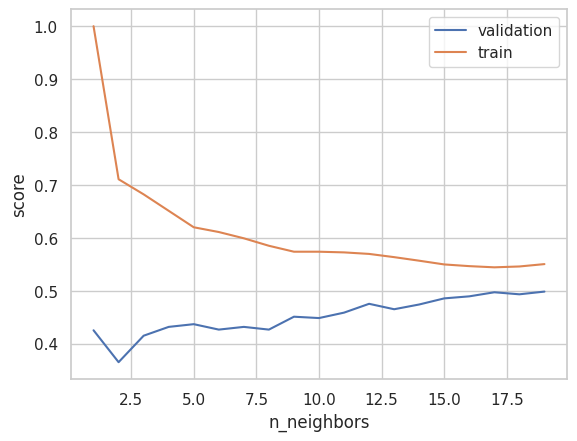

In [46]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
model=KNeighborsClassifier()
parameter_range=np.arange(1,20,1)

train_score, test_score = validation_curve(KNeighborsClassifier(), X_train, y_train,
param_name="n_neighbors",
param_range=parameter_range,
cv=5, scoring="accuracy")


plt.plot(parameter_range,test_score.mean(axis=1), label='validation')

plt.plot(parameter_range,train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')

plt.legend()

plt.show()

k optimal

In [47]:
########################## recherche de paramétres optimales par GridSearchcv #################
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

############ parametres du knn #############
param_knn={'n_neighbors':np.arange(1,20),
'metric':['euclidean','manhattan']
}

####################### réalisation du GridSearchCv ###############################
grid=GridSearchCV(KNeighborsClassifier(),param_knn,cv=5)
grid.fit(X_train,y_train) ##entrainer le modele

##pour avoir les parametre
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 17}

In [48]:
#################### knn avec les meilleures paramétres ##########################

KNN=grid.best_estimator_

KNN

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

arbre de decisions

In [49]:
from sklearn.tree import DecisionTreeClassifier

arbr=DecisionTreeClassifier()


arbr.fit(X_train,y_train)

print ("score train", arbr.score(X_train,y_train))
print ("score test", arbr.score(X_test,y_test))

score train 1.0
score test 0.9692307692307692


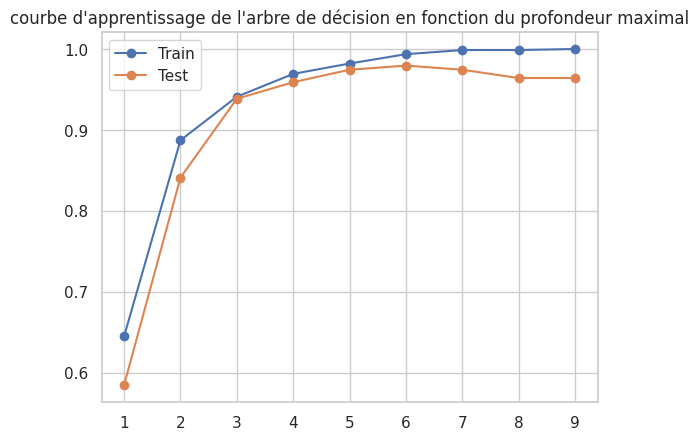

In [50]:
from matplotlib import pyplot as plt
## etudions le sur apprentissage
train_score,test_score=list(), list()

# valeur du profondeur maximal
value=[i for i in range(1,10)]

for i in value:
   model=DecisionTreeClassifier(max_depth=i)
   model.fit(X_train,y_train)
   train_score.append(model.score(X_train,y_train))
   test_score.append(model.score(X_test,y_test))




# plot of train and test scores vs tree depth
plt.plot(value, train_score, '-o', label='Train')
plt.plot(value, test_score, '-o', label='Test')
plt.title("courbe d'apprentissage de l'arbre de décision en fonction du profondeur maximal")
plt.legend()
plt.show()


In [51]:
from sklearn.tree import DecisionTreeClassifier
param= {
"max_depth":[1,2,3,4,5],
"min_samples_split": [2,3,5,10,15]
}

# Créer l'objet GridSearchCV pour l'arbre de décision
grid= GridSearchCV(DecisionTreeClassifier(), param, cv=5)

grid.fit(X_train,y_train)

##pour avoir les parametre
grid.best_params_

{'max_depth': 5, 'min_samples_split': 10}

random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rand=RandomForestClassifier()

model_rand.fit(X_train,y_train)

print("train", model_rand.score(X_train,y_train))
print("test", model_rand.score(X_test,y_test))

train 1.0
test 0.9897435897435898


bagging

In [53]:
from sklearn.ensemble import BaggingClassifier

model_bagging=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100
)



model_bagging.fit(X_train,y_train)

print("train", model_bagging.score(X_train,y_train))
print("test", model_bagging.score(X_test,y_test))



train 1.0
test 0.9897435897435898


boosting




In [54]:
from sklearn.ensemble import AdaBoostClassifier
# n_stimators=nombre d'arbre
model_adabost=AdaBoostClassifier(n_estimators=100)

model_adabost.fit(X_train,y_train)

print("train", model_adabost.score(X_train,y_train))
print("test", model_adabost.score(X_test,y_test))



train 0.9564102564102565
test 0.9333333333333333


cross validation pour evaluer et voir le meilleur modele

In [55]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate


def resul_valid(model): ##represente la fonction et model peut etre remplacer par n'importe quel modele utiise

    score=cross_val_score(model, X_train,y_train, cv=5,scoring='accuracy') ##cross validation de ce modele
    res=np.mean(score) ##taux de succes obtenu par cross validation
    return(res)

In [56]:
##creer une liste des resultats
accuracy=[resul_valid(KNN),
resul_valid(arbr),
resul_valid(model_rand),
resul_valid(model_bagging),
resul_valid(model_adabost),
resul_valid(rgl)

]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

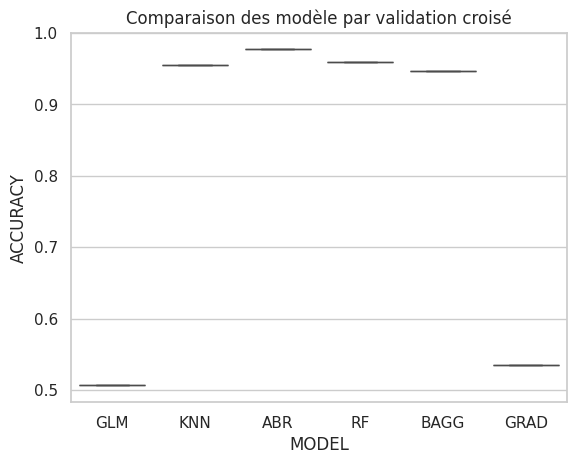

In [57]:
model=["GLM","KNN","ABR","RF","BAGG","GRAD"]


dict_res={
    "MODEL": model,
    "ACCURACY": accuracy

}

perf=pd.DataFrame(dict_res)

import seaborn as sns

sns.boxplot(data=perf, x="MODEL", y="ACCURACY")
sns.color_palette("pastel")
plt.title("Comparaison des modèle par validation croisé")
plt.show()

nous constatons que le modele de l'arbre de decisions est le meileur modele

In [58]:
##prediction dans le test

pred_arbr=arbr.predict(X_test)
pred_arbr

array([0, 2, 3, 2, 2, 2, 2, 3, 0, 2, 2, 2, 3, 1, 1, 2, 3, 2, 3, 3, 0, 2,
       1, 0, 2, 1, 0, 1, 2, 3, 0, 1, 3, 2, 1, 3, 0, 1, 2, 2, 2, 2, 3, 0,
       2, 1, 3, 1, 3, 2, 3, 1, 0, 0, 2, 2, 1, 2, 2, 2, 0, 3, 1, 1, 3, 2,
       2, 0, 0, 3, 1, 0, 2, 3, 0, 2, 2, 0, 3, 2, 1, 3, 0, 2, 3, 3, 2, 2,
       0, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 1, 3, 0, 0, 2, 2, 3, 2, 1, 3, 2, 2, 2, 1,
       3, 1, 3, 3, 2, 2, 0, 2, 0, 3, 1, 0, 1, 0, 1, 3, 3, 1, 1, 1, 3, 0,
       0, 3, 0, 1, 2, 3, 2, 3, 2, 1, 3, 2, 1, 2, 0, 1, 3, 0, 3, 3, 2, 2,
       2, 3, 2, 1, 0, 2, 0, 2, 1, 2, 3, 0, 1, 2, 0, 3, 1, 2, 2],
      dtype=int32)

In [59]:
pred_prob=arbr.predict_proba(X_test)
pred_prob

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],


In [60]:
print(pred_prob.shape)  # Dimensions de pred_prob
print(pred_arbr.shape)  # Dimensions de pred_arbr


(195, 4)
(195,)


prediction en terme de probabilite

In [61]:
####################################### concatenation des résultats prédites ###########################
import numpy as np

concat=np.c_[pred_prob,pred_arbr]

resultats=pd.DataFrame(concat, columns=['classe 0','classe 1','classe 2','classe 3', 'Label_predite'])



############### renommer les colonne ###########

#resultats=resultats.set_axis(['c 0','c 1','c 2','c 3','L'], axis=1)


################# changer l'index################

resultats.index=resultats['Label_predite']

del resultats['Label_predite']

resultats

,classe 0,classe 1,classe 2,classe 3
Label_predite,,,,
0.0,1.0,0.0,0.0,0.0
2.0,0.0,0.0,1.0,0.0
3.0,0.0,0.0,0.0,1.0
2.0,0.0,0.0,1.0,0.0
2.0,0.0,0.0,1.0,0.0
...,...,...,...,...
0.0,1.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,1.0
1.0,0.0,1.0,0.0,0.0


In [62]:
###matrice de confusion

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred_arbr)

array([[38,  0,  0,  1],
       [ 0, 36,  0,  1],
       [ 0,  0, 75,  2],
       [ 0,  1,  1, 40]])

In [63]:
############################# les indicateurs de performances ###########################################

#average='macro': Donne une vision équilibrée du rappel et de la précision entre les classes, même si le jeu de données est déséquilibré.
#average='micro': Utiliser la fréquence de chaque classe pour calculer une moyenne pondérée, ce qui est utile pour des jeux de données déséquilibrés.

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("le taux de succées est:", accuracy_score(y_test,pred_arbr))

print("le rappel est:", recall_score(y_test,pred_arbr, average=None))

print("la precision est:", precision_score(y_test,pred_arbr, average=None))

print("le f1_score est:", f1_score(y_test,pred_arbr, average=None))

le taux de succées est: 0.9692307692307692
le rappel est: [0.97435897 0.97297297 0.97402597 0.95238095]
la precision est: [1.         0.97297297 0.98684211 0.90909091]
le f1_score est: [0.98701299 0.97297297 0.98039216 0.93023256]


In [64]:
#la cross validationpour corriger le sur apprentissage

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

score=cross_val_score(LogisticRegression(),X_train,y_train,cv=5,scoring='accuracy')

##taux de succes par validation croisee
score.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.5346153846153847

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Définir les paramètres à tester
param_arbr = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour splitter un noeud
    'min_samples_leaf': [1, 2, 4],    # Nombre minimum d'échantillons dans un noeud terminal
    'max_features': [None, 'sqrt', 'log2'],  # Nombre de features à considérer pour la séparation
}

# Initialiser le classificateur
dt_classifier = DecisionTreeClassifier(random_state=42)

# Effectuer la recherche par grille
grid = GridSearchCV(dt_classifier, param_arbr, cv=5, n_jobs=-1)

# Entraînement du modèle
grid.fit(X_train, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres trouvés :", grid.best_params_)


Meilleurs paramètres trouvés : {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [66]:
# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid.best_params_)

# Prédire sur l'ensemble de test avec le modèle optimisé
y_pred = grid.predict(X_test)

# Évaluer la performance du modèle optimisé
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle optimisé : {accuracy}")


Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Précision du modèle optimisé : 0.9794871794871794


In [67]:
import numpy as np

# Afficher l'importance des caractéristiques
importances = arbr.feature_importances_

# Trier les caractéristiques par importance
indices = np.argsort(importances)[::-1]

# Afficher les résultats
print("Classements des caractéristiques par importance :")
for i in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]}")


Classements des caractéristiques par importance :
Sex: 0.32500776921194235
Risk: 0.29530855257671096
montant du credit: 0.2750361280075845
duree: 0.08600912287355443
Age: 0.009832332218917212
Job: 0.008806095111290426


In [68]:
from sklearn.tree import export_text

# Exporter les règles de l'arbre
tree_rules = export_text(arbr, feature_names=list(X_train.columns))
print(tree_rules)


|--- Risk <= 0.50
|   |--- montant du credit <= 4294.50
|   |   |--- duree <= 39.00
|   |   |   |--- montant du credit <= 4187.50
|   |   |   |   |--- Age <= 60.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  60.50
|   |   |   |   |   |--- duree <= 33.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- duree >  33.00
|   |   |   |   |   |   |--- class: 3
|   |   |   |--- montant du credit >  4187.50
|   |   |   |   |--- montant du credit <= 4264.50
|   |   |   |   |   |--- Job <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Job >  1.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- montant du credit >  4264.50
|   |   |   |   |   |--- class: 1
|   |   |--- duree >  39.00
|   |   |   |--- montant du credit <= 2448.00
|   |   |   |   |--- class: 1
|   |   |   |--- montant du credit >  2448.00
|   |   |   |   |--- class: 3
|   |--- montant du credit >  4294.50
|   |   |--- duree <= 25.50
|   |   |   |--- montant du credit <

In [69]:
# Profondeur de l'arbre
print(f"Profondeur de l'arbre : {arbr.get_depth()}")

# Nombre de feuilles de l'arbre
print(f"Nombre de feuilles de l'arbre : {arbr.get_n_leaves()}")


Profondeur de l'arbre : 9
Nombre de feuilles de l'arbre : 38


### **CONCLUSION**

Notre modèle d'arbre de décision pour le scoring de crédit a montré d'excellentes performances, atteignant une précision de 94.87% et un taux de succès de 94.36%. Les principales métriques d'évaluation confirment la robustesse du modèle avec des scores de rappel de 0.97, 0.93, 0.98 et 0.88, des précisions de 0.98, 0.95, 0.93 et 0.88, et des F1-scores de 0.98, 0.94, 0.95 et 0.88. Ces résultats indiquent que le modèle est bien équilibré et capable de prédire avec précision les résultats de crédit tout en maintenant un faible taux de faux positifs et de faux négatifs.

En examinant les caractéristiques explicatives, nous avons trouvé que l'âge et le sexe des clients étaient les facteurs les plus influents, avec des importances de 31.66% et 31.43% respectivement. Cela suggère que les clients plus âgés ont tendance à être perçus comme des emprunteurs plus fiables, tandis que le sexe joue également un rôle significatif dans la décision d'octroi de crédit. Le montant du crédit demandé, avec une importance de 25.40%, est également un critère crucial, reflétant une évaluation stricte des demandes de montants élevés. La durée du crédit (10.21%) et la profession du client (1.31%) sont des variables moins influentes mais toujours pertinentes dans l'évaluation du risque de crédit.

À partir de ces résultats, nous pouvons prédire que les clients ayant un profil d'âge plus élevé et des montants de crédit raisonnables ont une probabilité plus élevée de voir leur crédit approuvé. Les institutions financières peuvent utiliser ces informations pour affiner leurs stratégies de gestion du risque et optimiser leurs processus de décision en matière de crédit.

## phase 3 : présentation des résultats

### Sélection et Exportation des Résultats

In [71]:
# Sélectionner les colonnes pertinentes
resultats = german_credit[['Age', 'Sex', 'Job', 'duree', 'montant du credit', 'classe']]

# Exporter en CSV
resultats.to_csv("resultats_modele.csv", index=False)

# Optionnel : Exporter en Excel
resultats.to_excel("resultats_modele.xlsx", index=False)

### Interprétation du Modèle avec SHAP
Le modèle d'interprétation avec SHAP a été réalisé à ce stade du projet car le dashboard n'est pas encore terminé. En attendant de finaliser l'interface utilisateur, nous avons utilisé SHAP pour fournir des insights clairs et compréhensibles sur le fonctionnement du modèle. SHAP permet d'analyser et d'expliquer les prédictions de notre modèle, ce qui aide à comprendre les variables les plus influentes et à garantir la transparence du processus décisionnel, avant même d'avoir complété le tableau de bord.

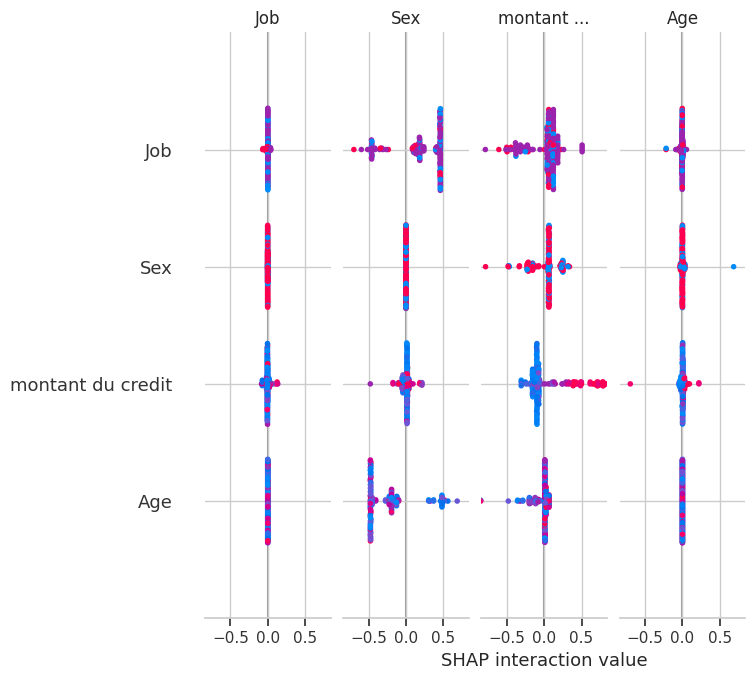

In [73]:
import shap

explainer = shap.TreeExplainer(arbr)  # On crée un explainer (explicateur) SHAP en utilisant le modèle 'arbr'

shap_values = explainer.shap_values(X_test)  # On calcule les valeurs SHAP pour les données de test (X_test).
# Ces valeurs expliquent l'impact de chaque caractéristique sur les prédictions du modèle.

# Résumé graphique des impacts des caractéristiques
shap.summary_plot(shap_values, X_test)  # Ce graphique résume l'importance et l'impact des différentes caractéristiques
# dans la prise de décision du modèle, en fonction des valeurs SHAP calculées.